# IBM Quantum Computing Workshop (18 May 2020)

- Only need to safe the token once obtained from the IBM Quantum Experience account
- from qiskit import IBMQ
- IBMQ.save_account('Token')

In [1]:
from qiskit import IBMQ
provider = IBMQ.load_account()

In [2]:
import qiskit

qiskit.__version__

'0.14.1'

# Getting Started with Aer

In [3]:
import numpy as np
from qiskit import(QuantumCircuit,
                   execute,
                   Aer)
from qiskit.visualization import plot_histogram

In [4]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [5]:
from qiskit import BasicAer
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

In [6]:
# Providers available in personal account
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
# Simulators that are available
provider.backends(simulator=True)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [9]:
from qiskit.providers.aer import QasmSimulator
backend_simulator = QasmSimulator()

# Set the backend options with "method" set as "statevector"
options = {'method': 'statevector'}

# Execute circuit using the backend options created
job = execute(qc, backend_simulator, backend_options=options)

# Print the result counts
result = job.result()
counts = result.get_counts(qc)

# Almost 50% chances for '00' and '11' out of 1024 shots
print("Result counts :", counts)

Result counts : {'00': 517, '11': 507}


In [10]:
# View each measurement individually by enabling the memory parameter for storing
aer_backend = Aer.get_backend('qasm_simulator')

# Set backend, shots, memory parameters and retrieve execution results
result = execute(qc, backend=aer_backend, shots=20, memory=True).result()

# Retrieve the individual results from the memory slots and print them
memory = result.get_memory(qc)
print("The retrieved memory results :\n", memory)

The retrieved memory results :
 ['00', '00', '11', '00', '11', '11', '11', '00', '00', '00', '11', '11', '00', '00', '00', '11', '00', '11', '00', '00']


In [11]:
# Construct a 2 qubit quantum ciruit
qc_init = QuantumCircuit(2, 2)

# Use numpy to simplify some maths
# Select the qubits by their indexes for initialization
init_qubits = [0, 1]

# Initialize the qubit states, the square values should add up to 1
qc_init.initialize([1, 0, 0, 1] / np.sqrt(2), init_qubits)

# Add measurements and draw the initialized circuit
qc_init.measure(range(2), range(2))
qc_init.decompose()
qc_init.draw()

┌──────────────────────────────────┐┌─┐   
q_0: ┤0                                 ├┤M├───
     │  initialize(0.70711,0,0,0.70711) │└╥┘┌─┐
q_1: ┤1                                 ├─╫─┤M├
     └──────────────────────────────────┘ ║ └╥┘
c_0: ═════════════════════════════════════╩══╬═
                                             ║ 
c_1: ════════════════════════════════════════╩═

In [12]:
result = execute(qc_init, aer_backend, shots=20, memory=True).result()

# Retrieve the initialized results from the memory slots and print them
memory = result.get_memory(qc_init)
print("The retrieved memory results for initialized circuit :\n", memory)

The retrieved memory results for initialized circuit :
 ['11', '00', '11', '00', '11', '00', '00', '00', '00', '11', '11', '00', '00', '11', '11', '11', '11', '00', '11', '11']


In [13]:
# Construct a 4 qubit quantum ciruit
qc_init2 = QuantumCircuit(4, 4)

# Initialize only the last 3 qubits
initialized_qubits = [1, 2, 3]

# Initialize the qubit states, the sum of amplitude-square values MUST be equal to 1
qc_init2.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier for ease of reading
qc_init2.barrier(range(4))

# Add measurements and draw the initialized circuit
qc_init2.measure(range(4), range(4))
qc_init2.decompose()
qc_init2.draw()

░ ┌─┐         
q_0: ─────────────────────────────────────────░─┤M├─────────
     ┌──────────────────────────────────────┐ ░ └╥┘┌─┐      
q_1: ┤0                                     ├─░──╫─┤M├──────
     │                                      │ ░  ║ └╥┘┌─┐   
q_2: ┤1 initialize(0,0.5,0,0.5,0,0.5,0,0.5) ├─░──╫──╫─┤M├───
     │                                      │ ░  ║  ║ └╥┘┌─┐
q_3: ┤2                                     ├─░──╫──╫──╫─┤M├
     └──────────────────────────────────────┘ ░  ║  ║  ║ └╥┘
c_0: ════════════════════════════════════════════╩══╬══╬══╬═
                                                    ║  ║  ║ 
c_1: ═══════════════════════════════════════════════╩══╬══╬═
                                                       ║  ║ 
c_2: ══════════════════════════════════════════════════╩══╬═
                                                          ║ 
c_3: ═════════════════════════════════════════════════════╩═

The retrieved count results :
 {'0010': 260, '1010': 247, '0110': 258, '1110': 259}


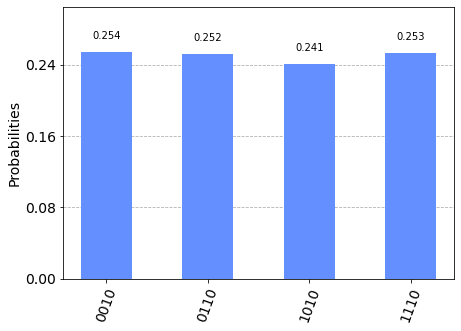

In [14]:
result = execute(qc_init2, backend_simulator).result()
counts = result.get_counts(qc_init2)

print("The retrieved count results :\n", counts)
plot_histogram(counts)

## H-gate is (2,2) matrix of ((1,1), (1, -1))

In [15]:
qc = QuantumCircuit(1)
qc.h(0)

#qc.z(0)
# Unitary of the circuit :
# [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
# [-0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]
    
# Set the simulator to the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator
result = execute(qc, simulator).result()

# Extract the unitary matrix from the results and print it
unitary = result.get_unitary(qc)
print("Unitary of the circuit :\n", unitary)

Unitary of the circuit :
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


The retrieved count results :
 {'00': 529, '11': 495}


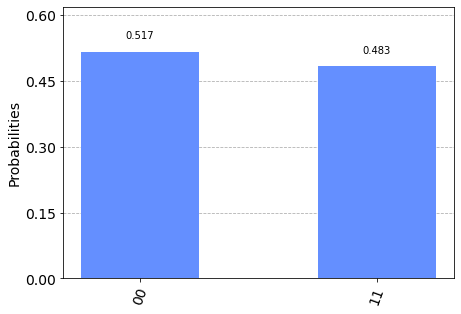

In [16]:
# Construct a 2 qubit quantum ciruit
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(0,1)
qc2.measure([0, 1],  [0, 1])

# Execute the circuit on the qasm simulator
result = execute(qc2, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts()

print("The retrieved count results :\n", counts)
plot_histogram(counts)

## Introducing Noise

The retrieved count results :
 {'10': 42, '00': 465, '01': 34, '11': 483}


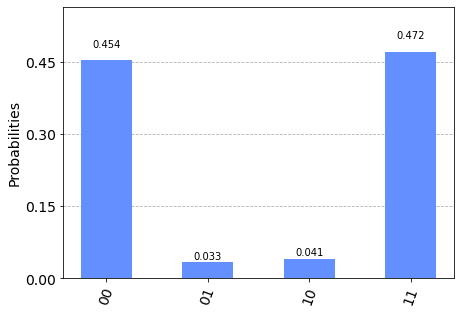

In [17]:
from qiskit.providers.aer.noise import NoiseModel

backend = provider.get_backend('ibmq_rome')
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from the noise model
basis_gates = noise_model.basis_gates

# Perform noise simulation
result = execute(qc2, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

counts = result.get_counts()

print("The retrieved count results :\n", counts)
plot_histogram(counts)

The retrieved count results :
 {'10': 109, '00': 405, '01': 73, '11': 437}


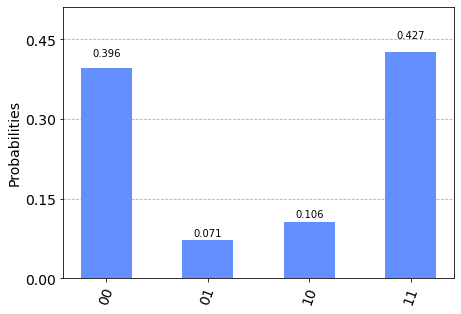

In [18]:
result = execute(qc2, provider.get_backend('ibmq_rome')).result()
counts = result.get_counts()

print("The retrieved count results :\n", counts)
plot_histogram(counts)

In [19]:
from qiskit.tools import jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [20]:
backend = provider.get_backend('ibmq_rome')

qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

job = execute(qc, backend)

In [21]:
backend = provider.get_backend('ibmq_vigo')

qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

job = execute(qc, backend)

# End of Program